<a href="https://colab.research.google.com/github/smccracken13/Zestimate-Project/blob/main/Zestimate_Feature_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
# load zillow_clean.csv
files.upload()

Saving zillow_clean.csv to zillow_clean.csv


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [55]:
df = pd.read_csv('zillow_clean.csv', low_memory=False, index_col = 'Unnamed: 0')

In [56]:
# Remove absolute log error column
df.drop(columns=['fips', 'abs_log_error'], inplace = True)

In [57]:
# set index to parcelid
df.set_index('parcelid', inplace=True)

In [58]:
cat_cols = ['transaction_month', 'transaction_day','transaction_quarter','aircon',
            'architecture', 'basementsqft', 'framing', 'deck', 'heating',
            'poolsizesum', 'county_land_use_code', 'land_use_code','zoning_code',
            'city', 'county', 'neighborhood','zipcode', 'storytypeid', 'material',
            'patio_sqft', 'shed_sqft','assessmentyear', 'taxdelinquencyyear','has_spa',
            'pool_with_spa', 'pool_without_spa', 'fireplaceflag']

prefix_list = ['tm', 'td', 'tq', 'air', 'arch', 'bsqft', 'fram', 'deck', 'heat',
               'poolsize', 'county_lu_code', 'lu_code', 'zoning', 'city',
               'county', 'neigh', 'zip', 'storyid', 'material', 'patiosqft', 'shedsqft',
               'assessyear', 'taxdelyear', 'has_spa', 'pool_with_spa', 'pool_without_spa', 'fireplaceflag']

prefix_dict = dict(zip(cat_cols, prefix_list))

In [59]:
# one-hot encode cat cols
df = pd.get_dummies(df, columns = cat_cols, prefix= prefix_dict, drop_first=True)
print(len(df.columns))

983


In [60]:
# Create train_test_split
X = df.loc[:, df.columns != 'logerror']
y = df['logerror']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
# sort into descending order
sorted_indices = importances.argsort()[::-1]

<ipython-input-62-c3aeb6dddce0>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


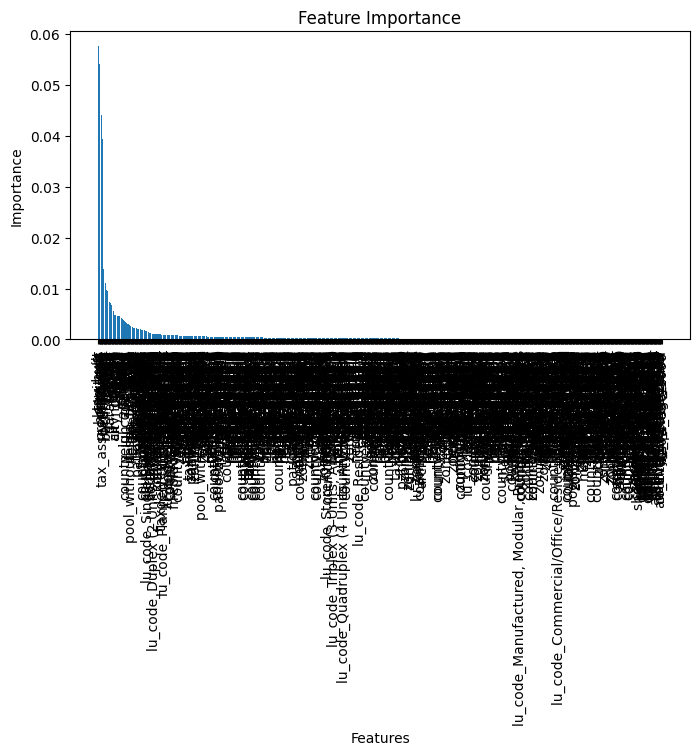

In [62]:
# plot
plt.figure(figsize=(8, 4))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

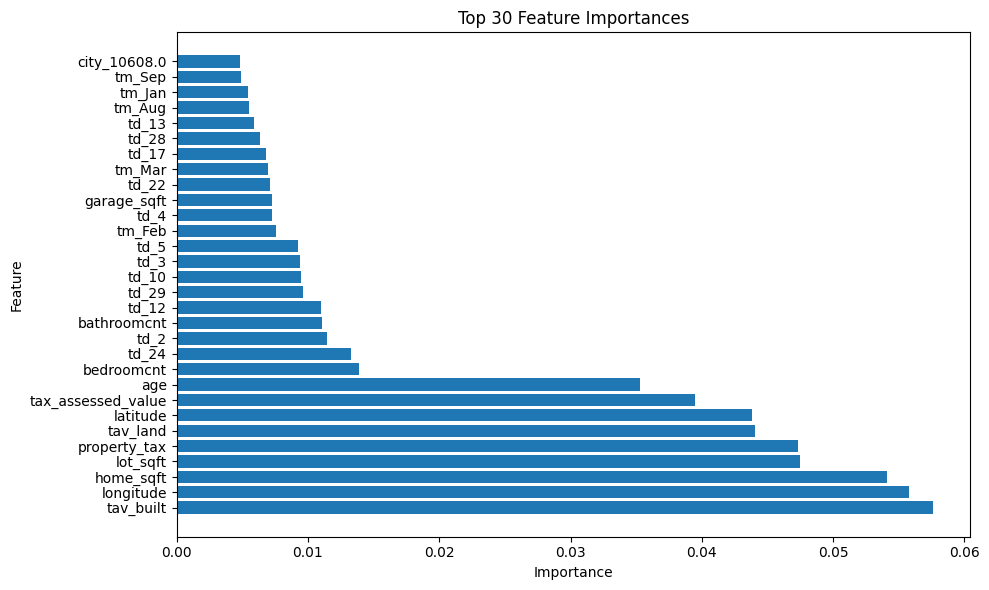

In [73]:
# plot top 30

# get top 30
importances = rf.feature_importances_
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importances = importances.sort_values(by='Importance', ascending=False)
top_30_features = importances.head(30)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_30_features['Feature'], top_30_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importances')
plt.tight_layout()
plt.show()

In [67]:
sorted_indices[0:10].shape

(10,)

In [64]:
print(sorted_indices)

[ 14   8   3   9  17  16   7  15  19   1  53  31   0  41  58  39  32  34
  22  33   6  51  26  46  57  42  20  23  30 380  69  40  62  55  48  24
  44  25  61  49   2  11  36  38  28 604 168  27  60  35  54  59  37  47
  56 567  45 980 578 952 231  52  50  63  43  12 437 957 889  29  84 378
  83  10 749   5 101  94 237 236 282  13 102 230  21 695 185 631 978 138
 971 127 858 232 532 760 731 179 975 748 942 535 223 274 976 233 697 401
 771 603 977 482 752 597 182   4 226 469 789 750 177 726 584 402 108 137
 433 890  18 895 512 732 944 981 261 238 514 922 242 109 245 766 692 368
 463 737 337 491 483 493 552 194 574 635 877 755 472 423 561 973 854 281
 234 743 899 960 713 392 266 263 843 363 243 555 774 779 326 439 480 686
 422 979 540 898 235 373 278  93 283 360 812 247 733 415 836 630 617 602
 641 704 464 110 454 171 769 945 837 136 873 832 450 959 377 315 869 421
 290 757 911 521 434 409 321 834 539 170 762 580 876 494 569 556 587 542
 708 458 828 585 648 947 565 928 950 736 817 674 41